In [58]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error

**Signum function**: A signum function for a real number is defined as

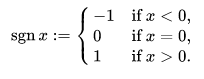

In [59]:
def sign(x):
    if(x >= 0):
        x = 1
    else:
        x = -1
    return x

**Creating dataset**

Condition given

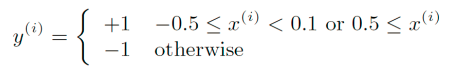


In [60]:
dat = np.zeros(200)
for i in range(200):
    dat[i] = (i - 100.0)/100.0

dat[199] = 1.0
y_var = np.zeros_like(dat)

for i in range(200):
    if(dat[i] >= 0.5 or (dat[i] >= -0.5 and dat[i] < 0.1)):
        y_var[i] = 1
    else:
        y_var[i] = -1

data_set = dat.reshape((dat.shape[0], 1))

In [61]:
print(data_set.shape)
print(y_var.shape)

(200, 1)
(200,)


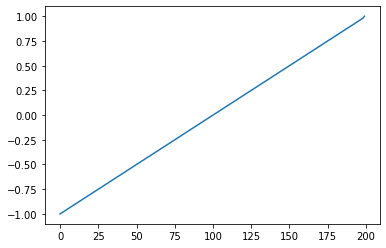

In [62]:
plt.plot(data_set)
plt.show()

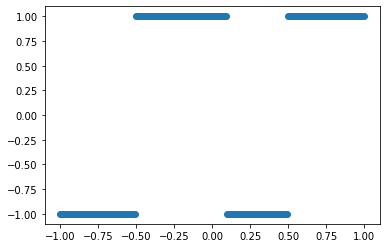

In [63]:
plt.scatter(data_set,y_var)
plt.show()

Error Rate: 0.44999999999999996


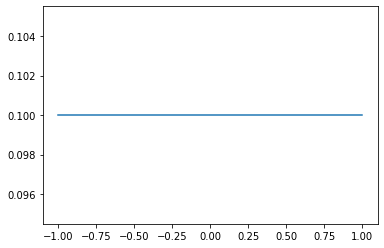

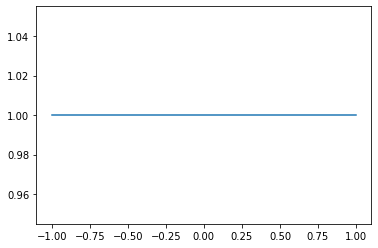

Error Rate: 0.385


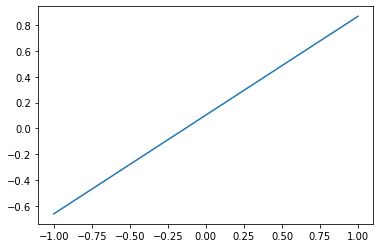

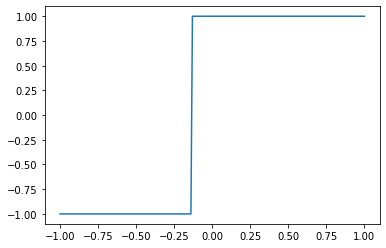

Error Rate: 0.31999999999999995


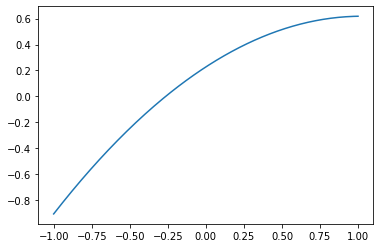

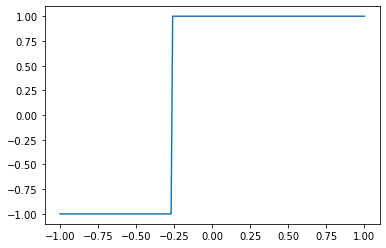

Error Rate: 0.14500000000000002


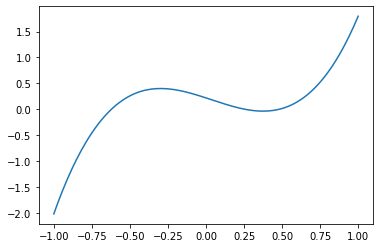

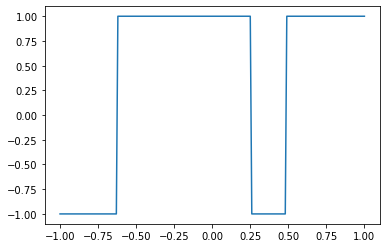

Error Rate: 0.18999999999999995


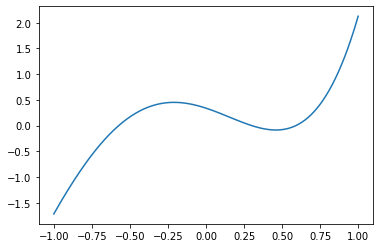

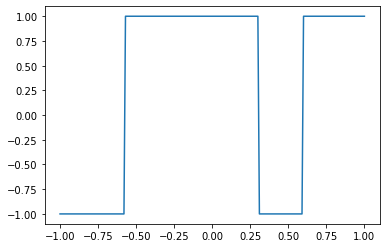

Error Rate: 0.06000000000000005


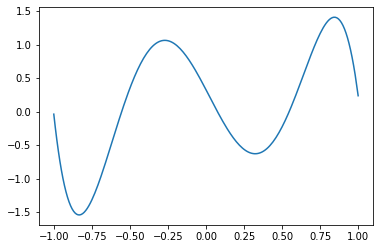

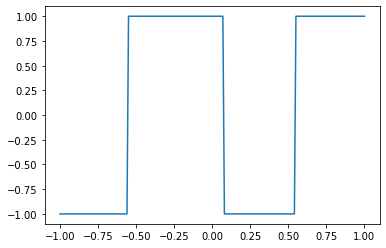

Error Rate: 0.05500000000000005


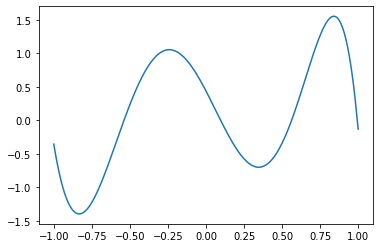

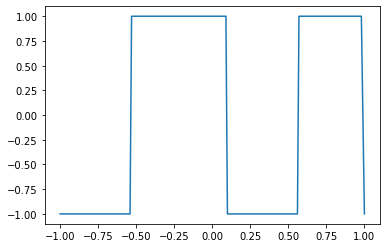

Error Rate: 0.025000000000000022


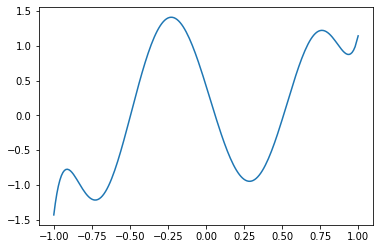

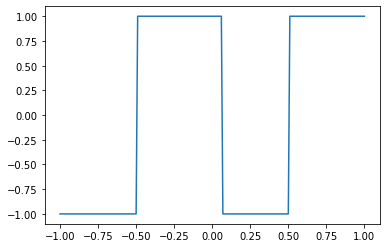

Error Rate: 0.025000000000000022


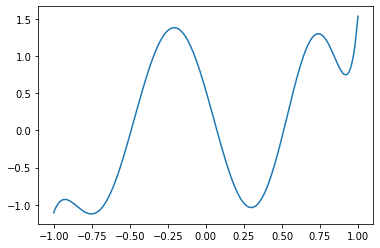

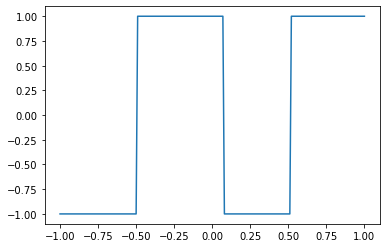

In [64]:
accuracy = []
err_rate = []
signum_array = np.vectorize(sign)

for i in range(9):
    poly = PolynomialFeatures(i)
    X = poly.fit_transform(data_set)
    L = LinearRegression()
    L.fit(X, y_var)

    coefficients = np.empty(i+1)
    m = 0

    for j in L.coef_:
        coefficients[m] = j
        m += 1
    coefficients[0] = L.intercept_ 

    revv = coefficients[::-1]
    polynom_val = np.polyval(revv, data_set)
    sign_class = signum_array(polynom_val)

    new_var = signum_array(L.predict(X))

    accuracy.append(accuracy_score(new_var, y_var))
    err_rate.append(1 - accuracy_score(new_var, y_var))

    print("Error Rate: " + str(1 - accuracy_score(new_var, y_var)))

    plt.plot(data_set, polynom_val)
    plt.show()

    plt.plot(data_set, sign_class)
    plt.show()

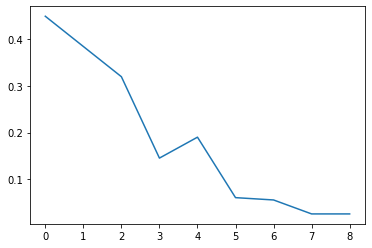

In [65]:
plt.plot(range(9), err_rate)
plt.show()

In [66]:
def pol(x):
    return 1 * (x + 0.5) * (x - 0.1) * (x - 0.5)

p_arr = np.vectorize(pol)
data_Set_2 = p_arr(data_set)
third_deg = signum_array(data_Set_2)

print("Error Rate: " + str(1-accuracy_score(third_deg, y_var)))

Error Rate: 0.0050000000000000044
